In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,Dropout
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing mnist data
from tensorflow.keras.datasets import mnist

In [4]:
# Loading mnist data having two tuples
(x_train_,y_train),(x_test_,y_test) = mnist.load_data()

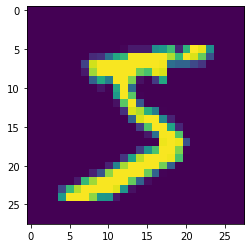

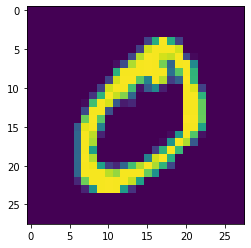

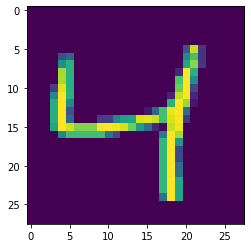

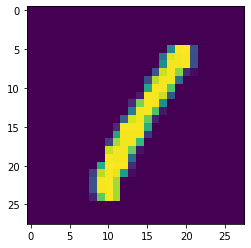

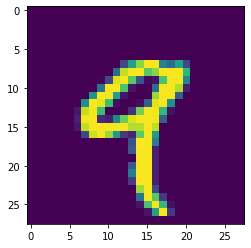

In [5]:
# Plotting images
for i in range(5):
  plt.figure()
  plt.imshow(x_train_[i])

In [6]:
# Finding shape of Image
(x_train_.shape,y_train.shape),(x_test_.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [7]:
x_train_[0].shape

(28, 28)

In [8]:
x_train_.max()

255

In [44]:
# Normalizing Image
# from range 0 to 255 -> 0 to 1

x_train,x_test = x_train_/255.0,x_test_/255.0


x_train__,x_test__ = x_train,x_test 



In [62]:
# # What is normalize using keras.utils
# I does not know why it not works

# x_train_ = tf.keras.utils.normalize(x_train_,axis=1)
# x_test_ = tf.keras.utils.normalize(x_test,axis=1)

In [11]:
x_train_

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
x_train.max()

1.0

In [14]:
# Reshaping image
# Conv2d requires 3 dimensional data but shape of input image is 2d i.e (28,28)
# Thus we need to  convert(28,28) to (28,28,1)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)



In [15]:
input_shape = x_train[0].shape

In [16]:
input_shape

(28, 28, 1)

Building Model

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape = input_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,batch_size =10,epochs=3,validation_data=(x_test,y_test),verbose =1)

Epoch 1/3
6000/6000 [==============================] - 252s 42ms/step - loss: 0.1504 - accuracy: 0.9545 - val_loss: 0.0462 - val_accuracy: 0.9848
Epoch 2/3
6000/6000 [==============================] - 259s 43ms/step - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 3/3
6000/6000 [==============================] - 259s 43ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0511 - val_accuracy: 0.9851


Epoch 10/10
6000/6000 [==============================] - 223s 37ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0451 - val_accuracy: 0.9904

In [20]:
history.history

{'accuracy': [0.9545333385467529, 0.9800666570663452, 0.9847166538238525],
 'loss': [0.15036612749099731, 0.06557921320199966, 0.04966343194246292],
 'val_accuracy': [0.9847999811172485, 0.987500011920929, 0.9850999712944031],
 'val_loss': [0.04621494933962822, 0.03890572115778923, 0.05112040042877197]}

In [21]:
rest_accuracy, test_loss = model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.0511 - accuracy: 0.9851


In [25]:
def plot_learning_curve(history):
  # Plotting Training and validation accuracy
  epoch_range = range(1,4)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

  # Plotting Training and validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

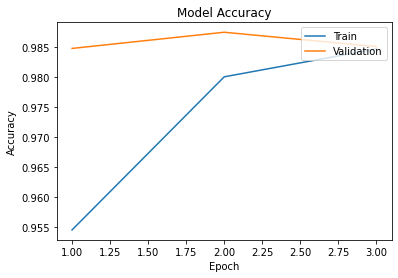

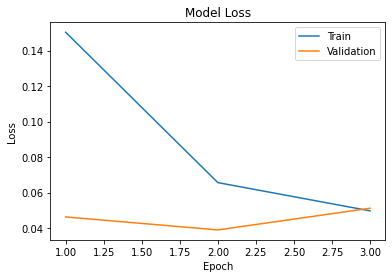

In [26]:
plot_learning_curve(history)

Saving Model

In [67]:
# To save and load model
!mkdir save

In [63]:
model.save('mnist_model.model')

INFO:tensorflow:Assets written to: mnist_model.model/assets


In [68]:
# Drive must be mounted
# Trying to save
model_name_to_save = 'mnist_model.h5'
path = F'/content/drive/My Drive/Saved_models/{model_name_to_save}'
torch.save(model.state_dict(), path)

AttributeError: ignored

In [64]:
!mkdir saved_model

# Tring to create new folder and save model
model.save('./saved_model/mnist_model.h5')

OSError: ignored

In [29]:
new_model = tf.keras.models.load_model('mnist_model.model')

In [33]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [35]:
y_predict = new_model.predict([x_test])

In [49]:
np.argmax(y_predict[9])

9

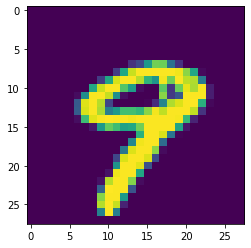

In [50]:
plt.imshow(x_test[9])
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

In [56]:
y_predict

array([[3.13466099e-15, 1.05997107e-10, 3.96154221e-10, ...,
        1.00000000e+00, 1.36672853e-15, 9.54920232e-09],
       [4.08649781e-11, 4.92512212e-11, 1.00000000e+00, ...,
        2.10515504e-14, 1.84703090e-14, 3.77408289e-19],
       [5.84431170e-10, 9.99997616e-01, 3.87407333e-08, ...,
        1.39224255e-06, 1.09176956e-09, 1.36947005e-08],
       ...,
       [2.21403791e-17, 7.26643357e-10, 4.76307802e-15, ...,
        6.20721530e-11, 7.50055629e-10, 8.37107095e-09],
       [1.15287554e-12, 2.25744350e-13, 3.34921010e-16, ...,
        3.33694877e-12, 6.08059514e-09, 6.02872266e-12],
       [4.77973749e-09, 1.13590552e-11, 1.04907816e-09, ...,
        1.21551817e-17, 1.03496222e-11, 7.22107378e-14]], dtype=float32)

In [57]:
y_pred =[]
for item in y_predict:
  y_pred.append(np.argmax(item))

In [58]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 3,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [59]:
cmt = confusion_matrix(y_pred,y_test)

In [60]:
cmt

array([[ 972,    0,    1,    0,    0,    2,    4,    0,    3,    1],
       [   0, 1132,    2,    0,    0,    0,    3,    1,    1,    3],
       [   4,    2, 1019,    2,    2,    1,    1,    8,    8,    0],
       [   0,    0,    1, 1006,    0,   14,    1,    1,    7,    7],
       [   0,    0,    0,    0,  968,    0,    1,    0,    3,    2],
       [   0,    0,    0,    1,    0,  873,    5,    0,    3,    7],
       [   2,    0,    0,    0,    3,    1,  943,    0,    0,    0],
       [   2,    1,    9,    1,    1,    1,    0, 1017,    5,    8],
       [   0,    0,    0,    0,    0,    0,    0,    1,  941,    1],
       [   0,    0,    0,    0,    8,    0,    0,    0,    3,  980]])